# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

# Proposal

I plan to make a final project about the education system in San Francisco. The education system ranges from pre-K to College. I will use two data, one is Schools, which includes Consolidated Infant, Pre-K, and K-14 education points for facilities both public and private; the other is Schools_College, which includes all SF Colleges.

In [15]:
import pandas as pd

In [16]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sodapy import Socrata

In [22]:
client = Socrata("data.sfgov.org", None)

In [23]:
results = client.get("tpp3-epx2", limit=2000)

In [24]:
results_df = pd.DataFrame.from_records(results)

In [25]:
results

[{'campus_name': 'Milk, Harvey Milk Childrens Center',
  'ccsf_entity': 'SFUSD',
  'lower_grade': '-2',
  'upper_grade': '-1',
  'grade_range': 'PK',
  'category': 'USD PreK',
  'map_label': 'CDC095',
  'lower_age': '3',
  'upper_age': '4',
  'general_type': 'CDC',
  'campus_address': '841 ELLIS ST, SAN FRANCISCO CA 94117',
  'supervisor_district': '6',
  'county_fips': '06075',
  'county_name': 'SAN FRANCISCO',
  'location_1': {'latitude': '37.783802',
   'longitude': '-122.420105',
   'human_address': '{"address": "", "city": "", "state": "CA", "zip": ""}'},
  ':@computed_region_fyvs_ahh9': '36',
  ':@computed_region_bh8s_q3mv': '28858',
  ':@computed_region_yftq_j783': '7',
  ':@computed_region_p5aj_wyqh': '9',
  ':@computed_region_rxqg_mtj9': '9'},
 {'campus_name': 'Mckinley Elementary School',
  'ccsf_entity': 'SFUSD',
  'lower_grade': '0',
  'upper_grade': '5',
  'grade_range': 'K-5',
  'category': 'USD Grades K-5',
  'map_label': 'PS075',
  'lower_age': '5',
  'upper_age': '10',

In [26]:
df = pd.DataFrame.from_records(results)

In [27]:
df

,campus_name,ccsf_entity,lower_grade,upper_grade,grade_range,category,map_label,lower_age,upper_age,general_type,...,supervisor_district,county_fips,county_name,location_1,:@computed_region_fyvs_ahh9,:@computed_region_bh8s_q3mv,:@computed_region_yftq_j783,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,cds_code
0,"Milk, Harvey Milk Childrens Center",SFUSD,-2,-1,PK,USD PreK,CDC095,3,4,CDC,...,6,06075,SAN FRANCISCO,"{'latitude': '37.783802', 'longitude': '-122.4...",36,28858,7,9,9,NaN
1,Mckinley Elementary School,SFUSD,0,5,K-5,USD Grades K-5,PS075,5,10,PS,...,8,06075,SAN FRANCISCO,"{'latitude': '37.766884', 'longitude': '-122.4...",3,28862,15,5,5,38684786041420
2,Jewish Community Center San Francisco - Rosenb...,Private,-2,-1,PK,Independent / Private,CDC058,3,4,CDC,...,1,06075,SAN FRANCISCO,"{'latitude': '37.784588', 'longitude': '-122.4...",11,54,11,6,2,380504700
3,Eureka Learning Center,Private,-2,-1,PK,Independent / Private,CDC035,3,4,CDC,...,8,06075,SAN FRANCISCO,"{'latitude': '37.754967', 'longitude': '-122.4...",22,28862,2,4,5,38684787044605
4,Noriega Early Education School,SFUSD,-2,5,PK-5,USD PreK/TK-5,PS085,3,10,PS,...,4,06075,SAN FRANCISCO,"{'latitude': '37.753834', 'longitude': '-122.5...",35,56,1,8,3,38684780117473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Golden Gate Guppies Preschool,Private,-2,-1,PK,Independent / Private,CDC046,3,4,CDC,...,2,06075,SAN FRANCISCO,"{'latitude': '37.789124', 'longitude': '-122.4...",27,29490,13,9,1,384002090
441,Lands End School,Private,-2,-1,PK,Independent / Private,CDC071,3,4,CDC,...,1,06075,SAN FRANCISCO,"{'latitude': '37.782593', 'longitude': '-122.5...",15,55,11,6,2,380506270
442,San Francisco Pacific Academy,Private,0,8,K-8,Independent / Private,IND317,5,13,IND,...,1,06075,SAN FRANCISCO,"{'latitude': '37.775639', 'longitude': '-122.4...",26,55,11,6,2,38684786146054
443,"Wells, Ida B. Wells High School",SFUSD,9,12,9-12,USD Grades 9-12,PS124,14,17,PS,...,5,06075,SAN FRANCISCO,"{'latitude': '37.775013', 'longitude': '-122.4...",10,29492,15,5,11,38684783830031


In [28]:
if df.isna().values.any():
    print("NaN values detected.")
    df_clean = df.dropna()
    print("Rows with NaN values have been deleted.")
else:
    df_clean = df
    print("No NaN values detected.")

NaN values detected.
Rows with NaN values have been deleted.


In [29]:
print("Schools without NaN values:")
print(df_clean)

Schools without NaN values:
                                           campus_name ccsf_entity  \
1                           Mckinley Elementary School       SFUSD   
2    Jewish Community Center San Francisco - Rosenb...     Private   
3                               Eureka Learning Center     Private   
4                       Noriega Early Education School       SFUSD   
6                         Montessori House Of Children     Private   
..                                                 ...         ...   
439                         Miraloma Elementary School       SFUSD   
440                      Golden Gate Guppies Preschool     Private   
441                                   Lands End School     Private   
442                      San Francisco Pacific Academy     Private   
443                    Wells, Ida B. Wells High School       SFUSD   

    lower_grade upper_grade grade_range               category map_label  \
1             0           5         K-5         USD Gra

In [30]:
df_clean.head()

,campus_name,ccsf_entity,lower_grade,upper_grade,grade_range,category,map_label,lower_age,upper_age,general_type,...,supervisor_district,county_fips,county_name,location_1,:@computed_region_fyvs_ahh9,:@computed_region_bh8s_q3mv,:@computed_region_yftq_j783,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,cds_code
1,Mckinley Elementary School,SFUSD,0,5,K-5,USD Grades K-5,PS075,5,10,PS,...,8,06075,SAN FRANCISCO,"{'latitude': '37.766884', 'longitude': '-122.4...",3,28862,15,5,5,38684786041420
2,Jewish Community Center San Francisco - Rosenb...,Private,-2,-1,PK,Independent / Private,CDC058,3,4,CDC,...,1,06075,SAN FRANCISCO,"{'latitude': '37.784588', 'longitude': '-122.4...",11,54,11,6,2,380504700
3,Eureka Learning Center,Private,-2,-1,PK,Independent / Private,CDC035,3,4,CDC,...,8,06075,SAN FRANCISCO,"{'latitude': '37.754967', 'longitude': '-122.4...",22,28862,2,4,5,38684787044605
4,Noriega Early Education School,SFUSD,-2,5,PK-5,USD PreK/TK-5,PS085,3,10,PS,...,4,06075,SAN FRANCISCO,"{'latitude': '37.753834', 'longitude': '-122.5...",35,56,1,8,3,38684780117473
6,Montessori House Of Children,Private,0,1,K-1,Independent / Private,IND276,5,6,IND,...,5,06075,SAN FRANCISCO,"{'latitude': '37.785046', 'longitude': '-122.4...",41,28858,13,9,11,380501318


In [38]:
df_clean['upper_age'] = df_clean['upper_age'].astype('Int64')
df_clean.groupby(['ccsf_entity']).upper_age.describe()

C:\Users\18507\AppData\Local\Temp\ipykernel_27468\3390474746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['upper_age'] = df_clean['upper_age'].astype('Int64')


,count,mean,std,min,25%,50%,75%,max
ccsf_entity,,,,,,,,
Private,268.0,7.847015,4.885478,3.0,4.0,4.0,13.0,17.0
SFUSD,126.0,11.785714,3.021542,4.0,10.0,10.0,13.0,17.0


In [39]:
import seaborn as sns

<Axes: xlabel='ccsf_entity', ylabel='upper_age'>

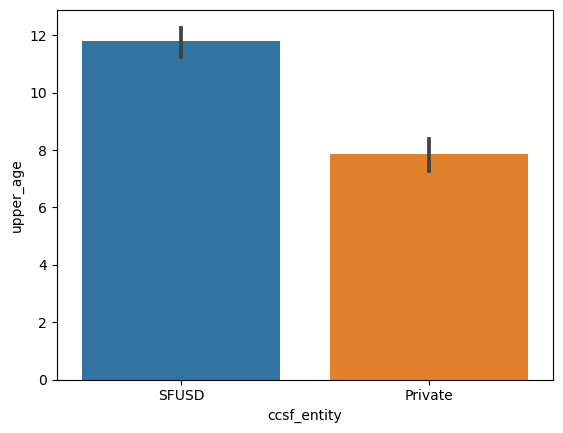

In [40]:
sns.barplot(df_clean, x="ccsf_entity", y="upper_age")

This bar chart shows that the average upper age of San Francisco Public Schools is higher than that of private schools.

In [42]:
client = Socrata("data.sfgov.org", None)
results = client.get("6adp-a5yv", limit=2000)
results_df2 = pd.DataFrame.from_records(results)

In [43]:
results_df2

,the_geom,institutio,campus,address,webaddress,phone,st_area_sh,st_length
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",University of California Hastings College of Law,<Null>,100 McAllister St,www.uchastings.edu,4155654600,13049.0734069,492.593768398
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",University of California Hastings College of Law,<Null>,198 McAllister St,www.uchastings.edu,4155654600,22642.0566851,604.439177564
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",University of California Hastings College of Law,<Null>,376 Larkin St,www.uchastings.edu,4155654600,25762.1622049,650.066090787
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,NaN,2300 Stockton St,NaN,0,37469.1661473,821.907182228
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,NaN,701 Chestnut St,NaN,0,10364.1319299,432.953368839
5,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,NaN,1849 Washington St,NaN,0,26179.635931,676.830315904
6,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,NaN,740 Taylor St,NaN,0,3621.87854176,240.900064298
7,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,NaN,2151 Van Ness Ave,NaN,0,23960.0305452,630.000215155
8,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,NaN,688 Sutter St,NaN,0,4142.44586303,273.714408873
9,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,NaN,625 Sutter St,NaN,0,6508.57776288,378.159728775


In [47]:
df2 = pd.DataFrame.from_records(results_df2)

In [48]:
import numpy as np

In [52]:
df2_clean=df2.drop(columns=['campus', 'webaddress','phone'])

In [56]:
df2_clean

,the_geom,institutio,address,st_area_sh,st_length
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",University of California Hastings College of Law,100 McAllister St,13049.0734069,492.593768398
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",University of California Hastings College of Law,198 McAllister St,22642.0566851,604.439177564
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",University of California Hastings College of Law,376 Larkin St,25762.1622049,650.066090787
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,2300 Stockton St,37469.1661473,821.907182228
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,701 Chestnut St,10364.1319299,432.953368839
5,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,1849 Washington St,26179.635931,676.830315904
6,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,740 Taylor St,3621.87854176,240.900064298
7,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,2151 Van Ness Ave,23960.0305452,630.000215155
8,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,688 Sutter St,4142.44586303,273.714408873
9,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Academy of Art University,625 Sutter St,6508.57776288,378.159728775


In [59]:
df2_clean.groupby(['institutio']).address.count()

institutio
Academy of Art University                                        15
American College of Traditional Chinese Medicine                  1
American Conservatory Theater                                     1
California Culinary Academy                                       1
California Institute of Integral Studies                          1
City College of San Francisco                                     7
Everest College-San Francisco                                     1
Golden Gate University-San Francisco                              1
Heald College-San Francisco                                       1
Marinello Schools of Beauty                                       1
Miami Ad School-San Francisco                                     1
San Francisco Art Institute                                       1
San Francisco Conservatory of Music                               1
San Francisco Institute of Esthetics and Cosmetology              1
San Francisco State University       

The table shows that Academy of Art University is the most widely located, with 15 campuses or buildings, followed by City College of San Francisco, with 7 campuses or buildings.

I have to say that I am confused about my final so far and I have many ideas. For example, a crime map can be added to display the crime rates around schools of various levels, and more data can be added to analyze crimes around elementary schools and colleges and what factors affect them. I regret that I cannot express my ideas clearly in this session. I need to do more research during the spring break and think carefully about my final project.